In [49]:
import seaborn as sns
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from scipy.stats import chi2_contingency

# link to Kaggle competition
# https://www.kaggle.com/competitions/mlpro-classification-bank-churn-2025


In [65]:
# Dataset
# Customer ID : Un identifiant pour chaque client
# Surname : Le nom de famille du client
# Credit Score : Une valeur numérique représentant le score de crédit du client
# Geography : Le pays où réside le client (France, Spain ou Germany)
# Gender : Le genre du client (Male or Female)
# Age : L’âge du client
# Tenure : Le nombre d’années pendant lesquelles le client est avec la banque
# Balance : Le solde du compte du client
# NumOfProducts : Le nombre de produits bancaires utilisés par le client (par exemple, compte d’épargne, carte de crédit)
# HasCrCard : Si le client possède une carte de crédit (1 = oui, 0 = non)
# IsActiveMember : Si le client est un membre actif (1 = oui, 0 = non)
# EstimatedSalary : Le salaire estimé du client
# Exited : Si le client a résilié (1 = oui, 0 = non)

df = pd.read_csv('data/train_data.csv')
df_exited = df["Exited"]

df.head()


,ID,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,37765,15794860,Ch'eng,627,France,Male,28.0,7,131694.04,1,1.0,1.0,161205.61,0
1,130453,15728005,Hargreaves,597,France,Male,34.0,2,0.00,2,0.0,1.0,181419.29,0
2,77297,15686810,Ts'ui,724,France,Male,39.0,7,0.00,2,1.0,1.0,100862.54,0
3,40858,15760244,Trevisano,663,Germany,Female,56.0,5,118577.24,3,1.0,0.0,61164.45,1
4,19804,15810563,French,627,France,Female,33.0,5,0.00,2,1.0,1.0,103737.82,0


# Analyse

### IsActiveMember

In [51]:
df_active_member = df["IsActiveMember"]

# IsActiveMember et Exited sont 2 variables discrète
pd.crosstab(df["IsActiveMember"], df["Exited"])

Exited,0,1
IsActiveMember,,
0.0,50742,21507
1.0,62387,8943


In [47]:
exited_count = len(df.query("Exited == 1"))
exited_count
exited_inactive_percentage = len(df.query('Exited == 1 and IsActiveMember == 0')) / exited_count
exited_active_percentage = len(df.query('Exited == 1 and IsActiveMember == 1')) / exited_count
print(f"{exited_inactive_percentage:.0%} des inactifs ont quitté la banque vs {exited_active_percentage:.0%} des actifs")

71% des inactifs ont quitté la banque vs 29% des actifs


In [ ]:
# Test du chi2 pour vérifier que IsActiveMember et Exited ne sont pas indépendante

# Hypothèse H0
# Le fait qu'un client soit actif ou non qu'il ait quitté sa banque sont 2 variables indépendantes l'une de l'autre

alpha = 0.02
contingency_table = pd.crosstab(df["IsActiveMember"], df["Exited"])
p_value = chi2_contingency(contingency_table).pvalue
print(p_value)
# Les 2 variables ne sont bien pas indépendantes l'une de l'autre

0.0


### Tenure

In [ ]:
df_tenure = df["Tenure"]
print(df_tenure.value_counts())
print("---")
sns.barplot(df_tenure.value_counts())
plt.show()

# Test du chi2 pour vérifier que Tenure et Exited ne sont pas indépendante

# Hypothèse H0
# Il n'y a pas de relation entre le nombre d’années pendant lesquelles le client est avec la banque et s'il a résilié

alpha = 0.02
contingency_table = pd.crosstab(df_tenure, df_exited)
p_value = chi2_contingency(contingency_table).pvalue
print(f"p_value = {p_value}")
if(p_value < alpha):
   print("Nous pouvons rejeter H0")
else:
   print("Nous n'avons pas suffisamment d'éléments pour rejeter H0")

# Les 2 variables ne sont bien pas indépendantes l'une de l'autre

Tenure
2     15766
7     15474
8     15272
4     15257
5     14984
1     14603
9     14557
3     14484
6     13716
10     5120
0      4346
Name: count, dtype: int64
---


KeyboardInterrupt: 

### Age

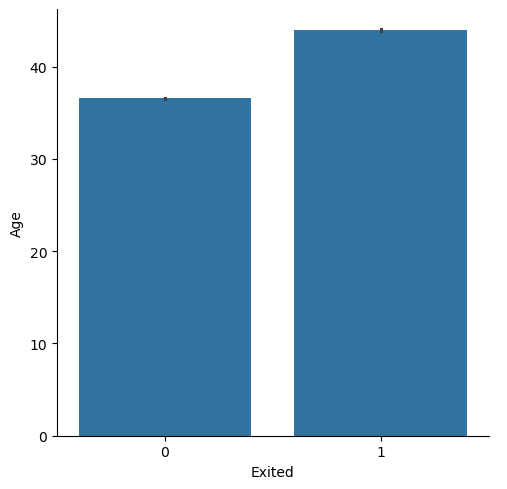

In [ ]:
df_age = df["Age"]
df_age.describe()
sns.catplot(df, y="Age", x="Exited", kind="bar")
plt.show()

### Credit score

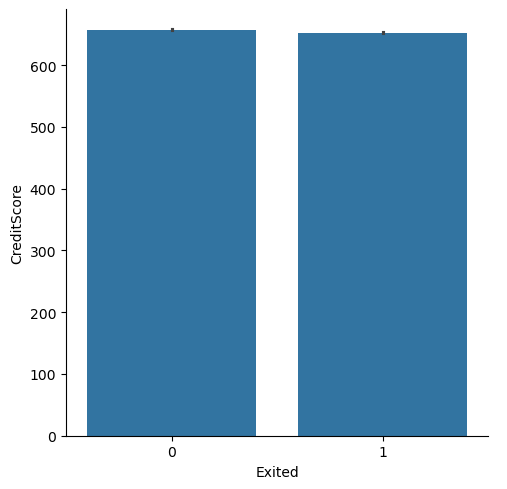

In [18]:
pd.Series(df["CreditScore"]).describe()
#sns.catplot(data=df, x="CreditScore", kind="box")
#plt.show()

grouped_credit_scores = df.groupby("Exited")["CreditScore"]
grouped_credit_scores.describe()
sns.catplot(df, y="CreditScore", x="Exited", kind="bar")
plt.show()


# Entrainement

In [ ]:

X = df[["CreditScore", "Age"]]
y = df["Exited"]

model = LogisticRegression()
model.fit(X, y)


LogisticRegression()

# Make prediction

In [12]:
test_set = pd.read_csv('data/test_data.csv')

X_pred = test_set[["CreditScore", "Age"]]
predictions = model.predict(X_pred)
predictions

results = pd.DataFrame({
   "ID": test_set["ID"],
   "Exited": predictions
})
results = results.set_index("ID")
results.to_csv("submission.csv")